This notebook makes the (final) version of the figure that shows the beta diversity across all site comparisons between aspirators and non-aspirators.

The beta diversity plot will be boxplots.

I copied this from 2018-01-03.asp_vs_nonasp_beta_fig_final.ipynb to make the same figure with Bray Curtis distance.

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Beta diversity

In [3]:
bc_in = '/Users/claire/github/aspiration-analysis/data/analysis/braycurtis.txt'
outfile = '../../final/figures/suppfig.asp_vs_nonasp_beta.braycurtis.png'
#outpatients = '../../final/patients/figure4.asp_vs_nonasp_beta.patients.txt'
#outsamples = '../../data/patients/figure4.asp_vs_nonasp_beta.samples.txt'

## Read in data
bc = pd.read_csv(bc_in, sep='\t')

/Users/claire/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (16,18,35,36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
## Set up colors, orders, and kwargs
site_comparisons = ['bal-throat_swab', 'bal-gastric_fluid', 'gastric_fluid-throat_swab']

asp_colors = {'Normal': '#B25116', 'Aspiration/Penetration': '#FB84D1', 'nan': '#C9C9C9'}
light_pink = '#FFC9EC'
light_brown = '#E5B699'

boxprops = {'edgecolor': 'k', 'linewidth': 2.5}#, 'facecolor': 'w'}
lineprops = {'color': 'k', 'linewidth': 2.5}

kwargs = {'palette': asp_colors,
          'hue_order': ['Normal', 'Aspiration/Penetration']}

boxplot_kwargs = dict({'boxprops': boxprops, 'medianprops': lineprops,
                       'whiskerprops': lineprops, 'capprops': lineprops,
                       'width': 0.75}, 
                      **kwargs)
stripplot_kwargs = dict({'linewidth': 0.6, 'size': 6, 'alpha': 0.7}, 
                        **kwargs)

/Users/claire/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


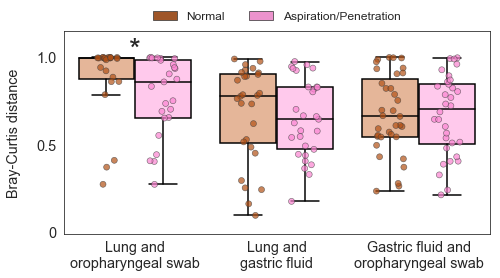

In [5]:
## Set up colors, orders, and kwargs

# Overall properties
kwargs = {'palette': asp_colors,
          'hue_order': ['Normal', 'Aspiration/Penetration']}

# Boxplot properties
boxprops = {'edgecolor': 'k'} #, #, 'facecolor': 'w'}
lineprops = {'color': 'k'} #, 'linewidth': 0.95}
boxplot_kwargs = dict({'boxprops': boxprops, 'medianprops': lineprops,
                       'whiskerprops': lineprops, 'capprops': lineprops}, 
                      **kwargs)
# Stripplot properties
stripplot_kwargs = dict({'linewidth': 0.6, 'size': 6, 'alpha': 0.7}, 
                        **kwargs)

## Set up plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(7, 4))

# JSD
# JSD dataframe has all of the possible comparisons in the entire OTU
# table. Keep just the within-subject comparisons across our sites
# of interest.
toplot = bc.query('site_comparison == @site_comparisons')\
               .query('patient_comp == "within"')

sns.boxplot(x='site_comparison', y='beta', data=toplot,
            order=site_comparisons, hue='mbs_consolidated',
            fliersize=0, **boxplot_kwargs)
sns.stripplot(x='site_comparison', y='beta', data=toplot,
              order=site_comparisons, hue='mbs_consolidated',
              split=True, jitter=0.2, 
              **stripplot_kwargs)

# Change face color of boxplots
for i, artist in enumerate(ax.artists):    
    if i % 2 == 1:
        artist.set_facecolor(light_pink)
    else:
        artist.set_facecolor(light_brown)

# Edit labels, etc
ax.set_ylabel('Bray-Curtis distance', fontsize='x-large')
ax.set_xticklabels('')
ax.set_xlabel('')
ax.set_ylim([-0.01, 1.15])
ax.set_yticks([0, 0.5, 1.0])
ax.set_yticklabels([0, 0.5, 1.0], fontsize='x-large')
ax.get_yaxis().set_label_coords(-0.1,0.5)
ax.set_xticklabels(['Lung and\noropharyngeal swab', 
                    'Lung and\ngastric fluid', 
                    'Gastric fluid and\noropharyngeal swab', 
                    'Oropharyngeal swab\nand stool'],
                  fontsize='x-large')

#txt = ax.text(-0.11, 1.025, 'A', transform=ax.transAxes, fontsize=24)

## P value indicators
ax.text(-0.05, 0.99, '*', fontsize='30')


handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], labels[0:2], 
              #loc=(0, 0), 
              loc='upper center', 
              fontsize='large',
              bbox_to_anchor=(0.5, 1.15), 
              ncol=2, frameon=False)
lgd.legendHandles[0]._sizes = [40]
lgd.legendHandles[1]._sizes = [40]

fig.tight_layout()
fig.savefig(outfile, dpi=200)

### P values

In [6]:
## P-values
from scipy.stats import ranksums

asp = 'Aspiration/Penetration'
nml = 'Normal'

# Not paired, probably non-parametric? Shouldn't matter much I think...
for s in site_comparisons:
    
    n = toplot.query('site_comparison == @s').query('mbs_consolidated == @nml')['beta']
    a = toplot.query('site_comparison == @s').query('mbs_consolidated == @asp')['beta']
    
    print(s, ranksums(n, a))

('bal-throat_swab', RanksumsResult(statistic=2.3217271666541204, pvalue=0.020247631177345904))
('bal-gastric_fluid', RanksumsResult(statistic=0.6704214515594339, pvalue=0.5025891635986253))
('gastric_fluid-throat_swab', RanksumsResult(statistic=0.18828616697003767, pvalue=0.8506523285821779))


### Median values

In [7]:
# Note these are not printed in the same order as in the figure, not
# sure why I can't get it to be re-ordered
toplot.groupby(['site_comparison', 'mbs_consolidated']).describe()['beta']

count      mean       std  \
site_comparison           mbs_consolidated                                    
bal-gastric_fluid         Aspiration/Penetration   29.0  0.649029  0.223396   
                          Normal                   28.0  0.684697  0.272561   
bal-throat_swab           Aspiration/Penetration   25.0  0.780744  0.222579   
                          Normal                   23.0  0.880349  0.218775   
gastric_fluid-throat_swab Aspiration/Penetration   32.0  0.668506  0.229420   
                          Normal                   35.0  0.674442  0.225053   

                                                       min       25%  \
site_comparison           mbs_consolidated                             
bal-gastric_fluid         Aspiration/Penetration  0.174574  0.472467   
                          Normal                  0.094270  0.507694   
bal-throat_swab           Aspiration/Penetration  0.271937  0.654654   
                          Normal                  0.272344  0.873394   
gastric_fluid-throat_swab Aspiration/Penetration  0.211768  0.501638   
                          Normal                  0.233262  0.545257   

                                                       50%       75%       max  
site_comparison           mbs_consolidated                                      
bal-gastric_fluid         Aspiration/Penetration  0.644773  0.829523  0.975168  
                          Normal                  0.778569  0.903601  0.989836  
bal-throat_swab           Aspiration/Penetration  0.858581  0.982443  0.999653  
                          Normal                  0.992878  0.997637  0.999061  
gastric_fluid-throat_swab Aspiration/Penetration  0.704480  0.848797  0.996873  
                          Normal                  0.661113  0.877959  0.998526